# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [40]:
fitbit = pd.read_csv("../data/Fitbit2.csv")

In [10]:
display(fitbit)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [38]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [39]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

In [74]:
# AVERAGE STEPS BY MONTH_ENCODED
steps_mean_month = fitbit.groupby(["Months_encoded"])["Steps"].mean()
steps_mean_month

Months_encoded
1      9892.064516
2      8922.866667
3     10312.935484
4     13079.033333
5     10620.096774
6     12536.166667
7      9193.322581
8     11584.774194
9      9191.333333
10     8272.451613
11     9467.466667
12     8470.064516
Name: Steps, dtype: float64

<AxesSubplot:xlabel='Months_encoded'>

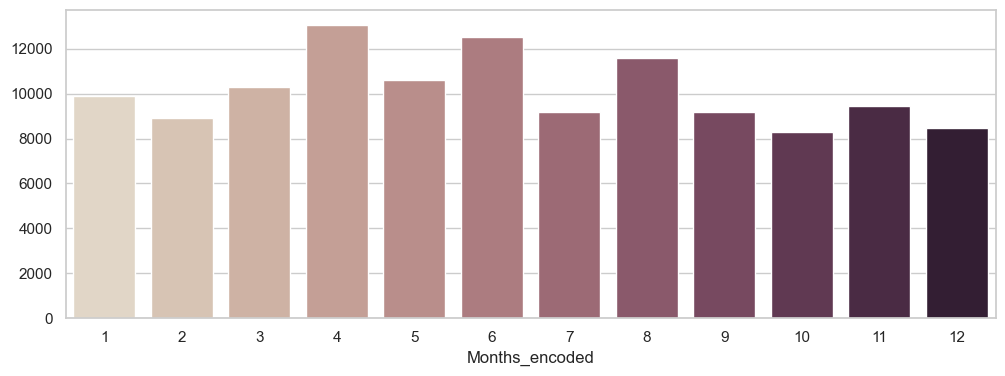

In [90]:
sns.barplot(x=steps_mean_month.index, y=steps_mean_month.values, palette="ch:.25")

In [106]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
steps_mean_months_laborable = fitbit.groupby(["Months_encoded", "Work_or_Weekend"]).mean()["Steps"].unstack()
steps_mean_months_laborable

Work_or_Weekend,0,1
Months_encoded,,
1,9618.400000,10022.380952
2,10882.250000,8210.363636
3,4941.250000,12181.347826
4,8285.666667,15133.333333
5,15005.900000,8531.619048
6,12717.125000,12470.363636
7,8851.000000,9312.391304
8,12462.900000,11166.619048
9,7846.750000,9680.272727


<AxesSubplot:title={'center':"Mean of steps by month and 'Work or Weekend'"}, xlabel='Months_encoded'>

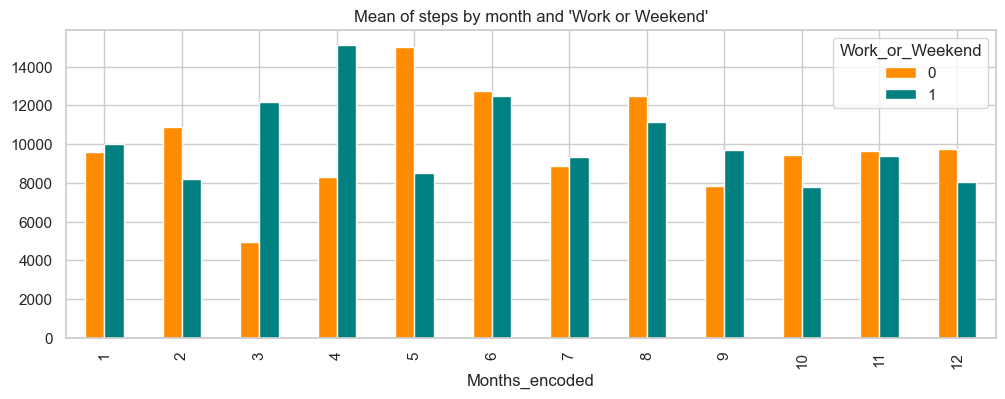

In [117]:
steps_mean_months_laborable.plot(kind="bar", title="Mean of steps by month and 'Work or Weekend'", color = ["darkorange", "teal"])

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

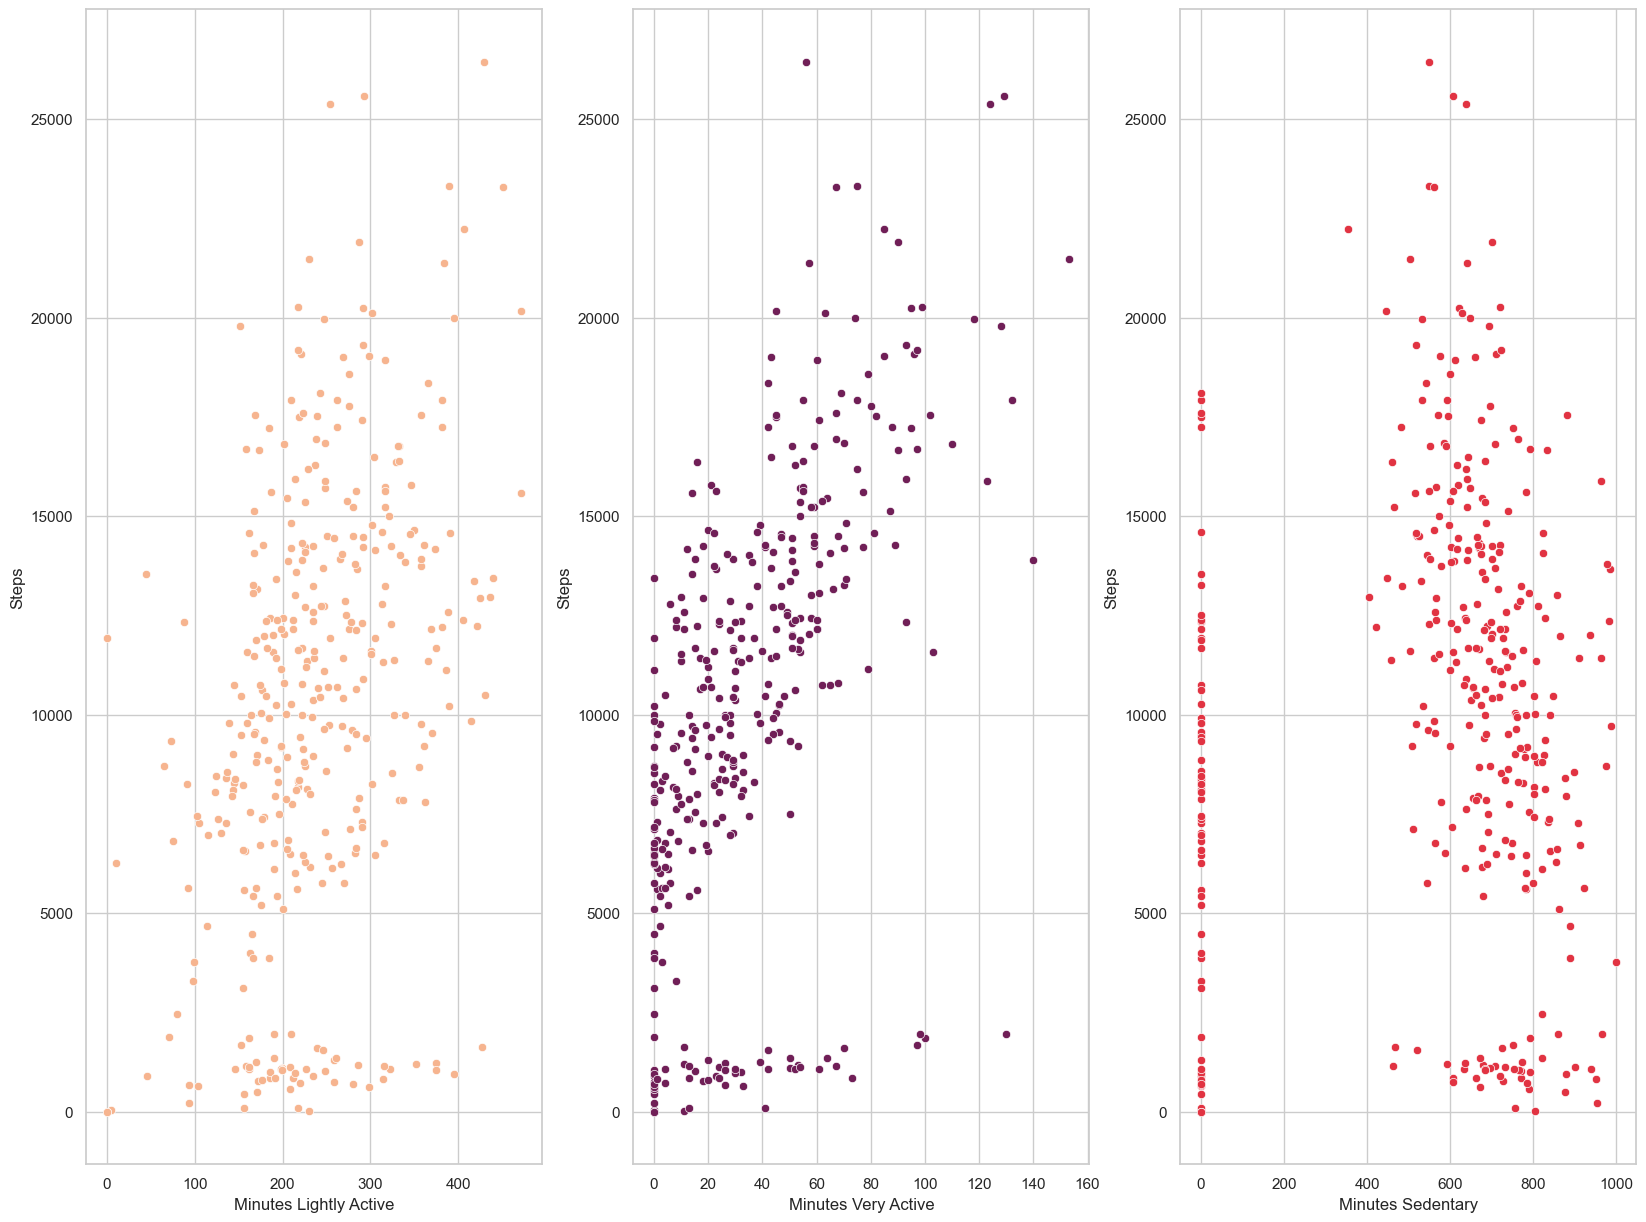

In [186]:
activity_to_plot = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))
for activity in activity_to_plot:
    sns.scatterplot(x=activity, y="Steps", data=fitbit, ax=axs[activity_to_plot.index(activity)], color = random.choice(sns.color_palette("rocket")))


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [4]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [163]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [11]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include="number")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [12]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include="object")

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
plt.style.use="classic"
sns.set(rc={"figure.figsize": (12.,6.)})

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

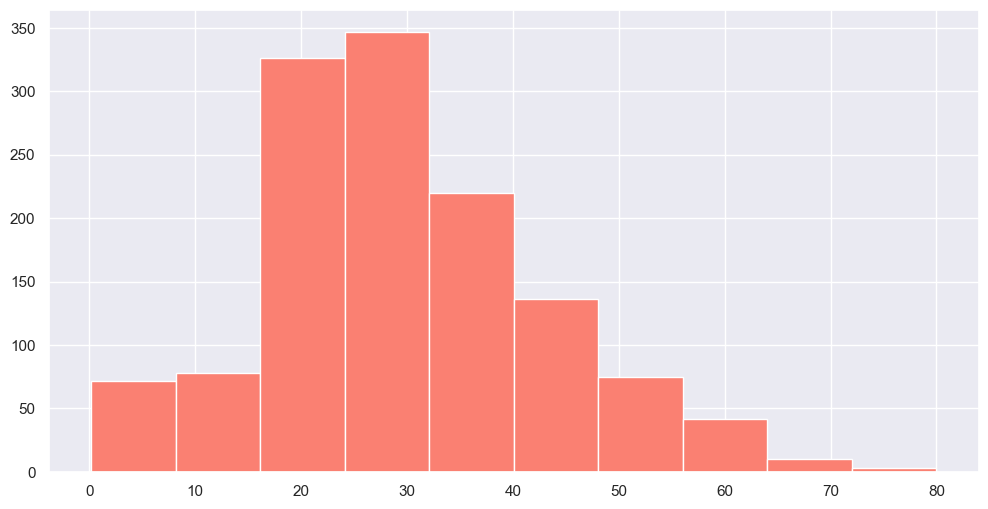

In [209]:
plt.hist(titanic['Age'], color = 'salmon')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <BarContainer object of 50 artists>)

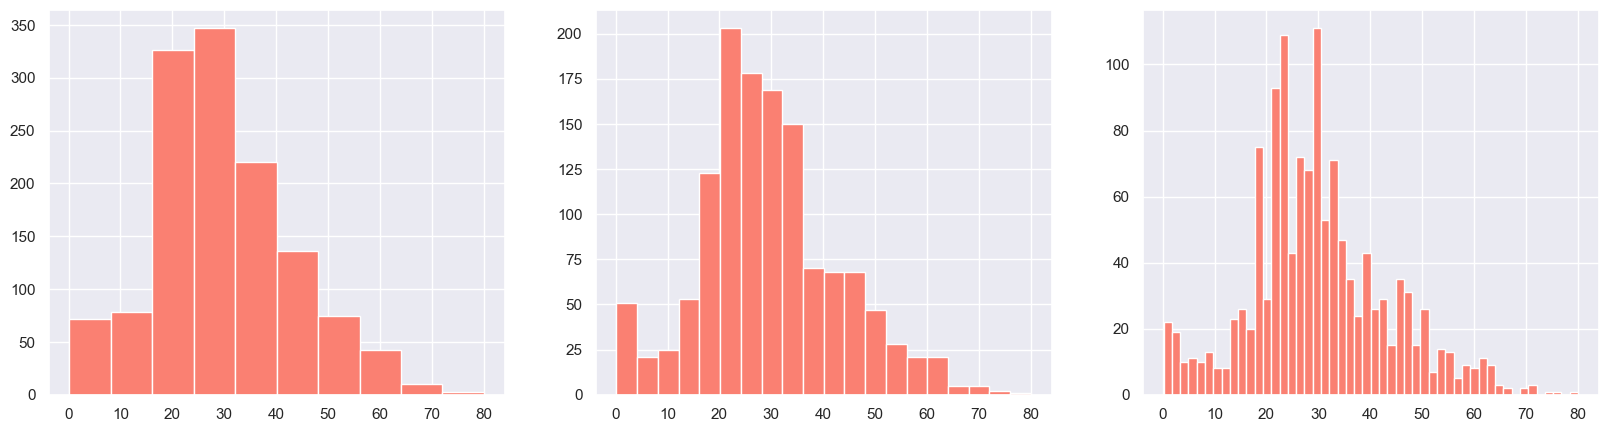

In [218]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

axs[0].hist(titanic['Age'], color = 'salmon', bins=10)
axs[1].hist(titanic['Age'], color = 'salmon', bins=20)
axs[2].hist(titanic['Age'], color = 'salmon', bins=50)


#### How does the bin size affect your plot?

1. The first plot has too few bins and has not enough detail of the distribution.

1. The second plot is the best reprensentation of the distribution of the data.

1. Finally, the last plot has too much detail and loses its ability to give an impression of the distribution of the data

#### Use seaborn to show the distribution of column `Age`.

[Text(0.5, 1.0, 'Distribution of age of Titanic passengers')]

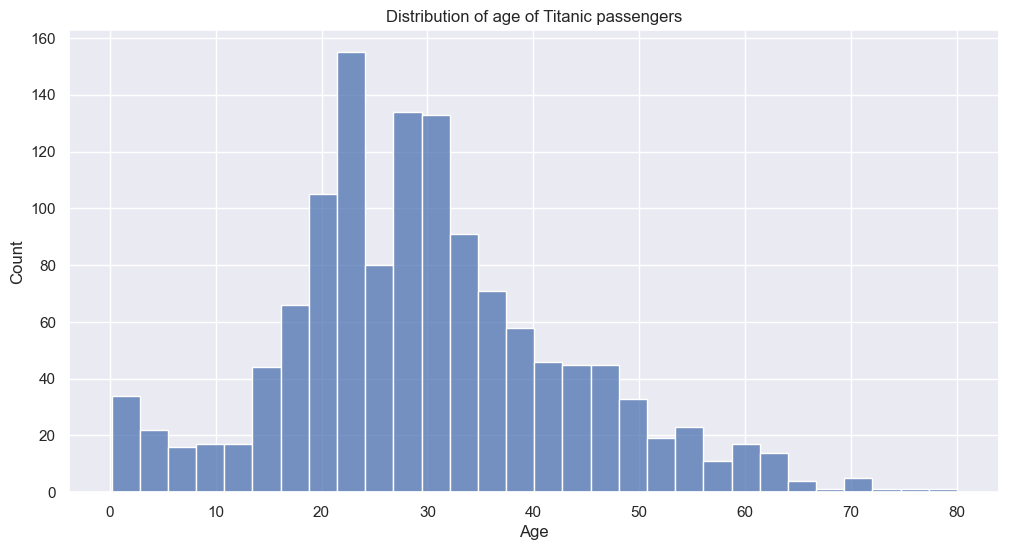

In [28]:
sns.histplot(x="Age", data = titanic).set(title='Distribution of age of Titanic passengers')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:title={'center':'Titanic passengers by gender'}>

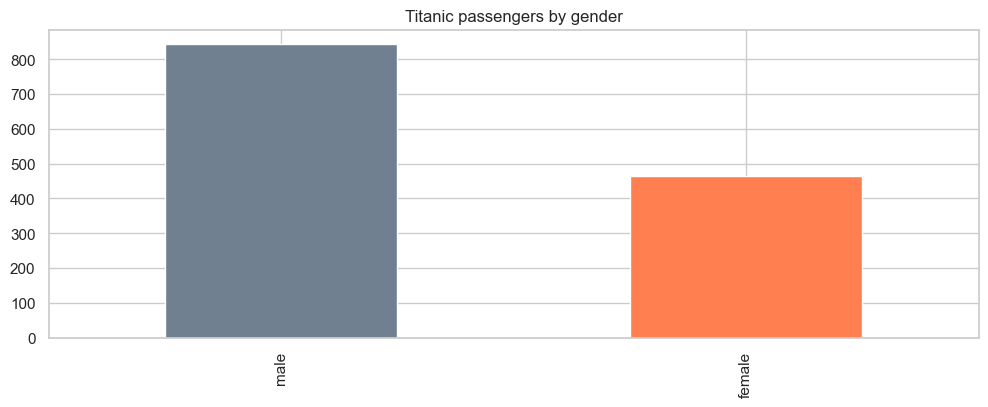

In [103]:
# Method 1 - matplotlib
titanic["Gender"].value_counts().plot(kind="bar", color=["slategray","coral"], title="Titanic passengers by gender")

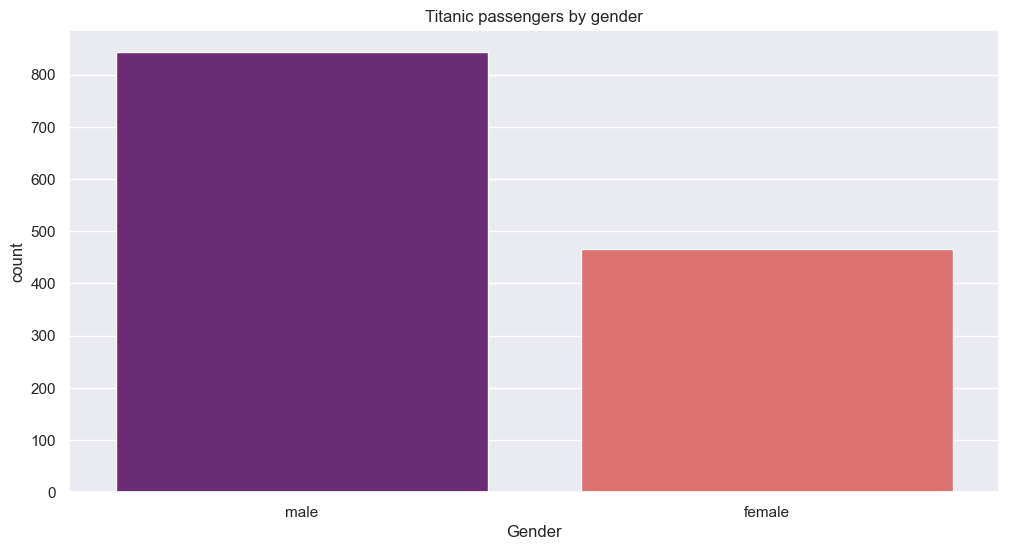

In [27]:
# Method 2 - seaborn
sns.countplot(x=titanic["Gender"], palette="magma").set(title='Titanic passengers by gender');

#### Use the right plot to visualize the column `Pclass`.

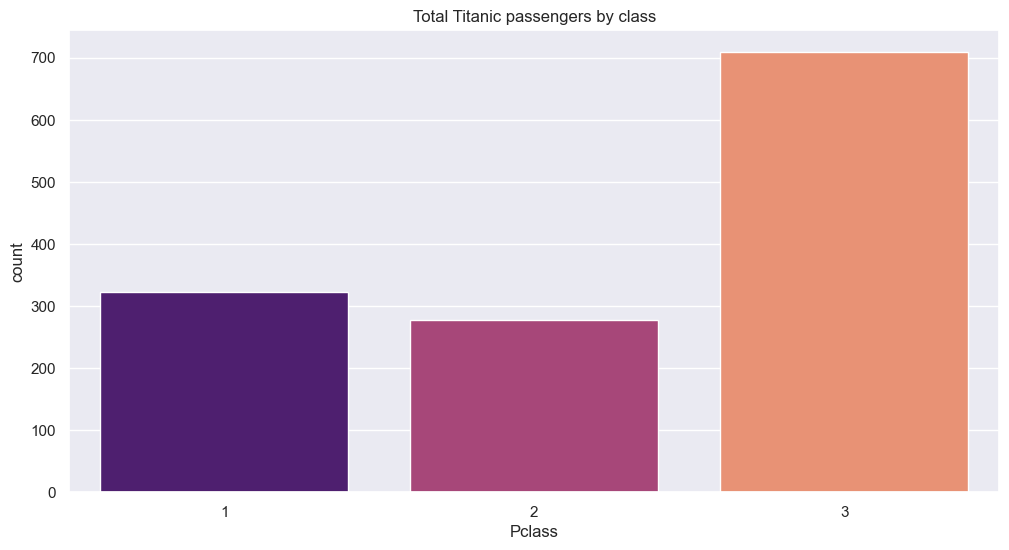

In [31]:
sns.countplot(x=titanic["Pclass"], palette="magma").set(title='Total Titanic passengers by class');

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [36]:
titanic["Age"].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

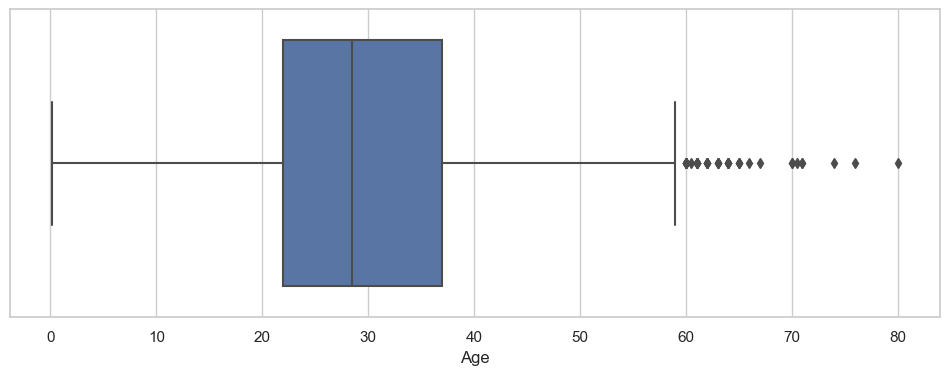

In [46]:
sns.boxplot(x="Age", data=titanic)

For plotting the summary statistics of a given feature of the dataset we use the boxplot

#### What does the last plot tell you about the feature `Age`?

It contains information of the max, min, median, the quartiles, the interquartile range and the median.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

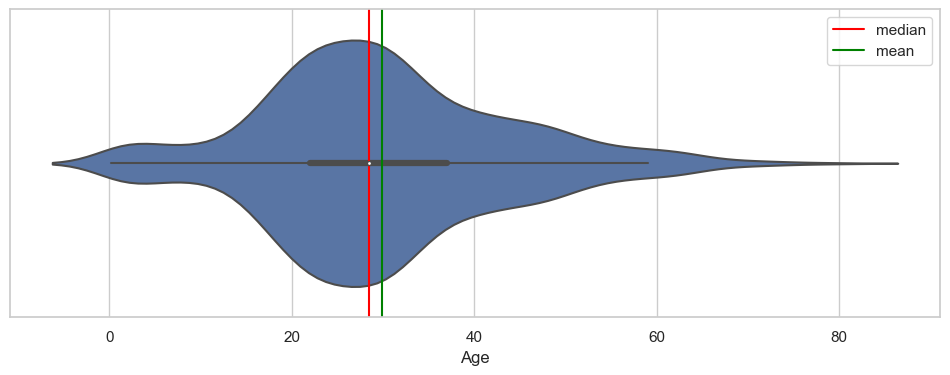

In [121]:
violin = sns.violinplot(x=titanic.Age)
violin.axvline(x=titanic.Age.median(), c="red", label="median")
violin.axvline(x=titanic.Age.mean(), c="green", label="mean")
plt.legend()

#### What additional information does the last plot provide about feature `Age`?

We can visually see that the median and the mean are not equal

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

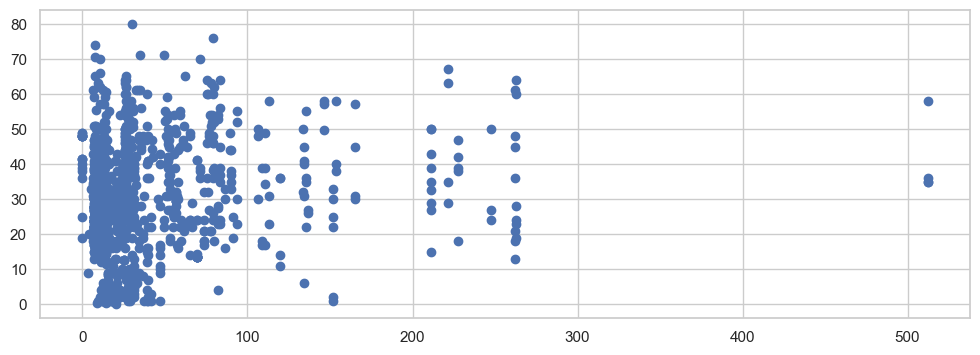

In [52]:
# Method 1 - matplotlib
plt.scatter(x=titanic["Fare"], y=titanic["Age"]);

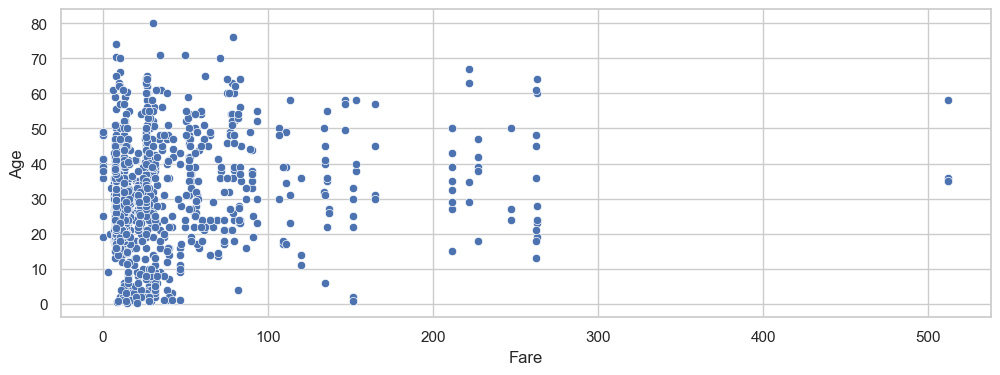

In [49]:
# Method 2 - seaborn
sns.scatterplot(x="Fare", y="Age", data=titanic);

#### Plot the correlation matrix using seaborn.

In [55]:
titanic_corr = titanic.corr()
titanic_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


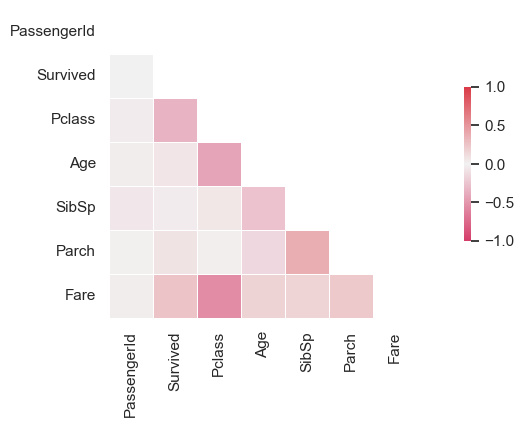

In [71]:
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .5} 
);

#### What are the most correlated features?

The moste correlated features are:

- Pclass & Fare
- Pclass & Age
- Pclass & Survived
- SibSp & Parch
- SibSp & Age
- Survived & Fare

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

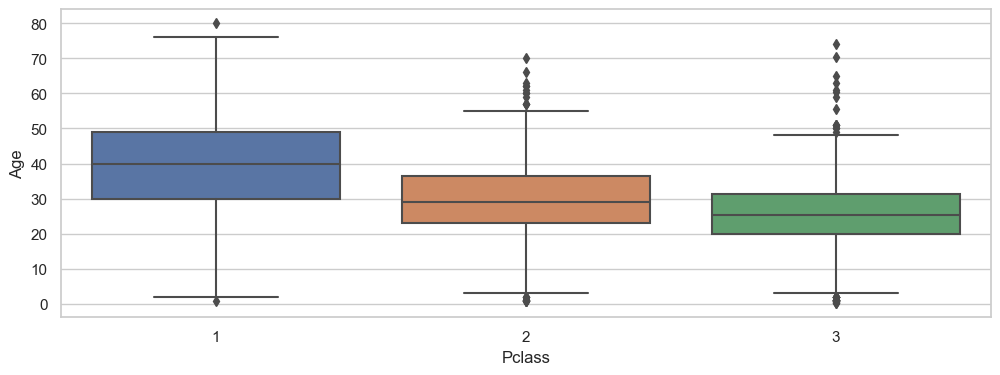

In [74]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

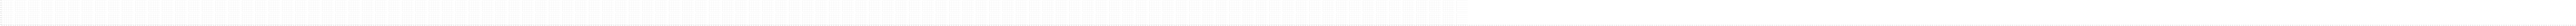

In [78]:
sns.FacetGrid(data=titanic, row="Gender", col="Age")